# Data Description

This data is a data of heart diseases that has been curated from 5 different sources namely; 
Cleveland
Hungarian
Switzerland
Long Beach VA
Statlog (Heart) Data Set.

This dataset consist of 1190 instances and 11 features.

Source: https://www.kaggle.com/datasets/mexwell/heart-disease-dataset?rvi=1

## Data Dictionary:**

*   **Sex**     
*       1 = male, 
*       0 = female
        
*   **Chest Pain Type:** 
*       Value 1: typical angina, 
*       Value 2: atypical angina, 
*       Value 3: non-anginal pain, 
*       Value 4: asymptomatic

*   **Fasting Blood sugar (fasting blood sugar > 120 mg/dl)**
*       1 = true; 
*       0 = false


*   **Resting electrocardiogram results:** 
*       Value 0: normal, 
*       Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 
*       Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


*   **Exercise induced angina:** 
*       1 = yes; 
*       0 = no


*   **The slope of the peak exercise ST segment:**  
*       Value 1: upsloping, 
*       Value 2: flat, 
*       Value 3: downsloping


*   **class** 
*       1 = heart disease, 
*       0 = Normal


# Package Imports


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# Importing Classifcation Algorithms

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Data Reading

In [2]:
# Loading dataset
heart_data = pd.read_csv(r'heart_disease.csv')

# Data Cleaning and Validation

In [3]:
class DataCleaning:
    # """
    # Data cleaning
    # """
    def __init__(self, data_path:str):
        self.data = pd.read_csv(data_path)
        
    def head_and_tail(self):
        head_data = self.data.head(10)
        tail_data = self.data.tail(10)
        combined_data = pd.concat([head_data, tail_data], ignore_index=True)

        return combined_data
    
    def get_columns(self):
        columns = self.data.columns
        print("Total Columns : ", len(columns))
        print("_"*20 + "\n")
        
        for i in range(len(columns)):
             print(str(i+1) + ". " + columns[i], end="\n")
        return
    
    def get_info(self):
        info = self.data.info()
        return info
    
    def get_data_description(self):   
        choice = input("Which column do you want a summary of?\n\n1. age\n2. sex\n3. chest pain type\n4. resting bp s\n5. cholesterol\n6. fasting blood sugar\n7. resting ecg\n8. max heart rate\n9. exercise angina\n10. oldpeak\n11. ST slope\n12. target \n\n :-> ")

        columns = self.data.columns
        cols = {}
        for i in range(len(columns)):
            cols[i] = columns[i]

        description = self.data.describe()
        for i in description:
            if str(i) == choice:
                return description[cols[i-1]]
    
    def get_normal_sample_view(self):
        dic = {
            'data_view' : self.head_and_tail(),
            'infomation' : self.get_info(),
            'columns' : self.get_columns(),
            'data_description' : self.get_data_description(),
        }
        
        
        

In [4]:
# Having a view of the data
head_data = heart_data.head(10)
tail_data = heart_data.tail(10)
combined_data = pd.concat([head_data, tail_data], ignore_index=True)
combined_data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [5]:
# finding the shape of the dataset
heart_data.shape

(1190, 12)

In [6]:
# having a general summary of the dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [7]:
# getting a statistical summary of the dataset

heart_data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [8]:
# checking for null values

heart_data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [9]:
# viewing columns
heart_data.columns


Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [10]:
def change_column_names(arr):
    for element in arr:
        if isinstance(element, str) and " " in element:  # Check if element is a string
            new_element = element.replace(" ", "_")
            heart_data.rename(columns={element:new_element}, inplace=True)
    return heart_data.columns


In [11]:
# changing column names 

change_column_names(heart_data.columns)

Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'ST_slope', 'target'],
      dtype='object')

In [12]:
# Making a copy of the dataset

Heart_data_copy = heart_data.copy()
Heart_data_copy

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [13]:
Heart_data_copy.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'ST_slope', 'target'],
      dtype='object')

In [14]:
# Checking the column fields data types 

Heart_data_copy.dtypes

age                      int64
sex                      int64
chest_pain_type          int64
resting_bp_s             int64
cholesterol              int64
fasting_blood_sugar      int64
resting_ecg              int64
max_heart_rate           int64
exercise_angina          int64
oldpeak                float64
ST_slope                 int64
target                   int64
dtype: object

In [15]:
# Changing data types to categorical

def change_type_to_categorical(dataset, column_name, value_options):
    dataset[column_name] = dataset[column_name].map(value_options)

columns_cat_maps = {
    'sex' : {0: 'Female', 1: 'Male'}, 
    'chest_pain_type' : {1: 'Typical Angina', 2: 'Atypical Angina', 3: 'Non-Angina', 4: 'Asymptomatic Angina'},
    'fasting_blood_sugar' : {0: 'False', 1: 'True'}, 
    'resting_ecg' : {0: 'Normal', 1: 'ST-T Wave Abnormality', 2: 'Left Ventricular Hypertrophy'},
    'exercise_angina' : {0: 'No', 1: 'Yes'}, 
    'ST_slope' : {1: 'Upsloping', 2: 'Flat', 3: 'Downsloping'},
    'target' : {0: 'Normal', 1: 'Heart Disease'}
}

for column, cat_values in columns_cat_maps.items():
    change_type_to_categorical(Heart_data_copy, column, cat_values)


In [16]:
# Defining bins for some categorical values

Heart_data_copy.tail()


,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
1185,45,Male,Typical Angina,110,264,False,Normal,132,No,1.2,Flat,Heart Disease
1186,68,Male,Asymptomatic Angina,144,193,True,Normal,141,No,3.4,Flat,Heart Disease
1187,57,Male,Asymptomatic Angina,130,131,False,Normal,115,Yes,1.2,Flat,Heart Disease
1188,57,Female,Atypical Angina,130,236,False,Left Ventricular Hypertrophy,174,No,0.0,Flat,Heart Disease
1189,38,Male,Non-Angina,138,175,False,Normal,173,No,0.0,Upsloping,Normal


In [17]:
# Defining bins for some categorical values

# age bins and labels
bins = [0, 12, 19, 35, 60, 90]
labels = ['Children', 'Teens', 'Youth', 'Adults', 'Old/Aged']

# Creating age groups
Heart_data_copy['age_group'] = pd.cut(Heart_data_copy['age'], bins=bins, labels=labels, right=False)

# bins and labels
bins = [0, 100, 130, 160, 190, float('inf')]
labels = ['Optimal', 'Near optimal', 'Borderline high', 'High', 'Very high']

# Create cholesterol groups
Heart_data_copy['cholesterol_level'] = pd.cut(Heart_data_copy['cholesterol'], bins=bins, labels=labels, right=False)

 
# bins and labels
bins = [70, 90, 120, 140, 190]
labels = ['Low', 'Ideal', 'Pre-High', 'High']

# Create resting_bps groups
Heart_data_copy['resting_bps_group'] = pd.cut(Heart_data_copy['resting_bp_s'], bins=bins, labels=labels, right=False)


In [18]:
Heart_data_copy.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target,age_group,cholesterol_level,resting_bps_group
0,40,Male,Atypical Angina,140,289,False,Normal,172,No,0.0,Upsloping,Normal,Adults,Very high,High
1,49,Female,Non-Angina,160,180,False,Normal,156,No,1.0,Flat,Heart Disease,Adults,High,High
2,37,Male,Atypical Angina,130,283,False,ST-T Wave Abnormality,98,No,0.0,Upsloping,Normal,Adults,Very high,Pre-High
3,48,Female,Asymptomatic Angina,138,214,False,Normal,108,Yes,1.5,Flat,Heart Disease,Adults,Very high,Pre-High
4,54,Male,Non-Angina,150,195,False,Normal,122,No,0.0,Upsloping,Normal,Adults,Very high,High


In [19]:
# Checking for null values

Heart_data_copy.isnull().sum()


age                     0
sex                     0
chest_pain_type         0
resting_bp_s            0
cholesterol             0
fasting_blood_sugar     0
resting_ecg             0
max_heart_rate          0
exercise_angina         0
oldpeak                 0
ST_slope                1
target                  0
age_group               0
cholesterol_level       0
resting_bps_group      10
dtype: int64

# Exploratory Data Analysis


## Univariate

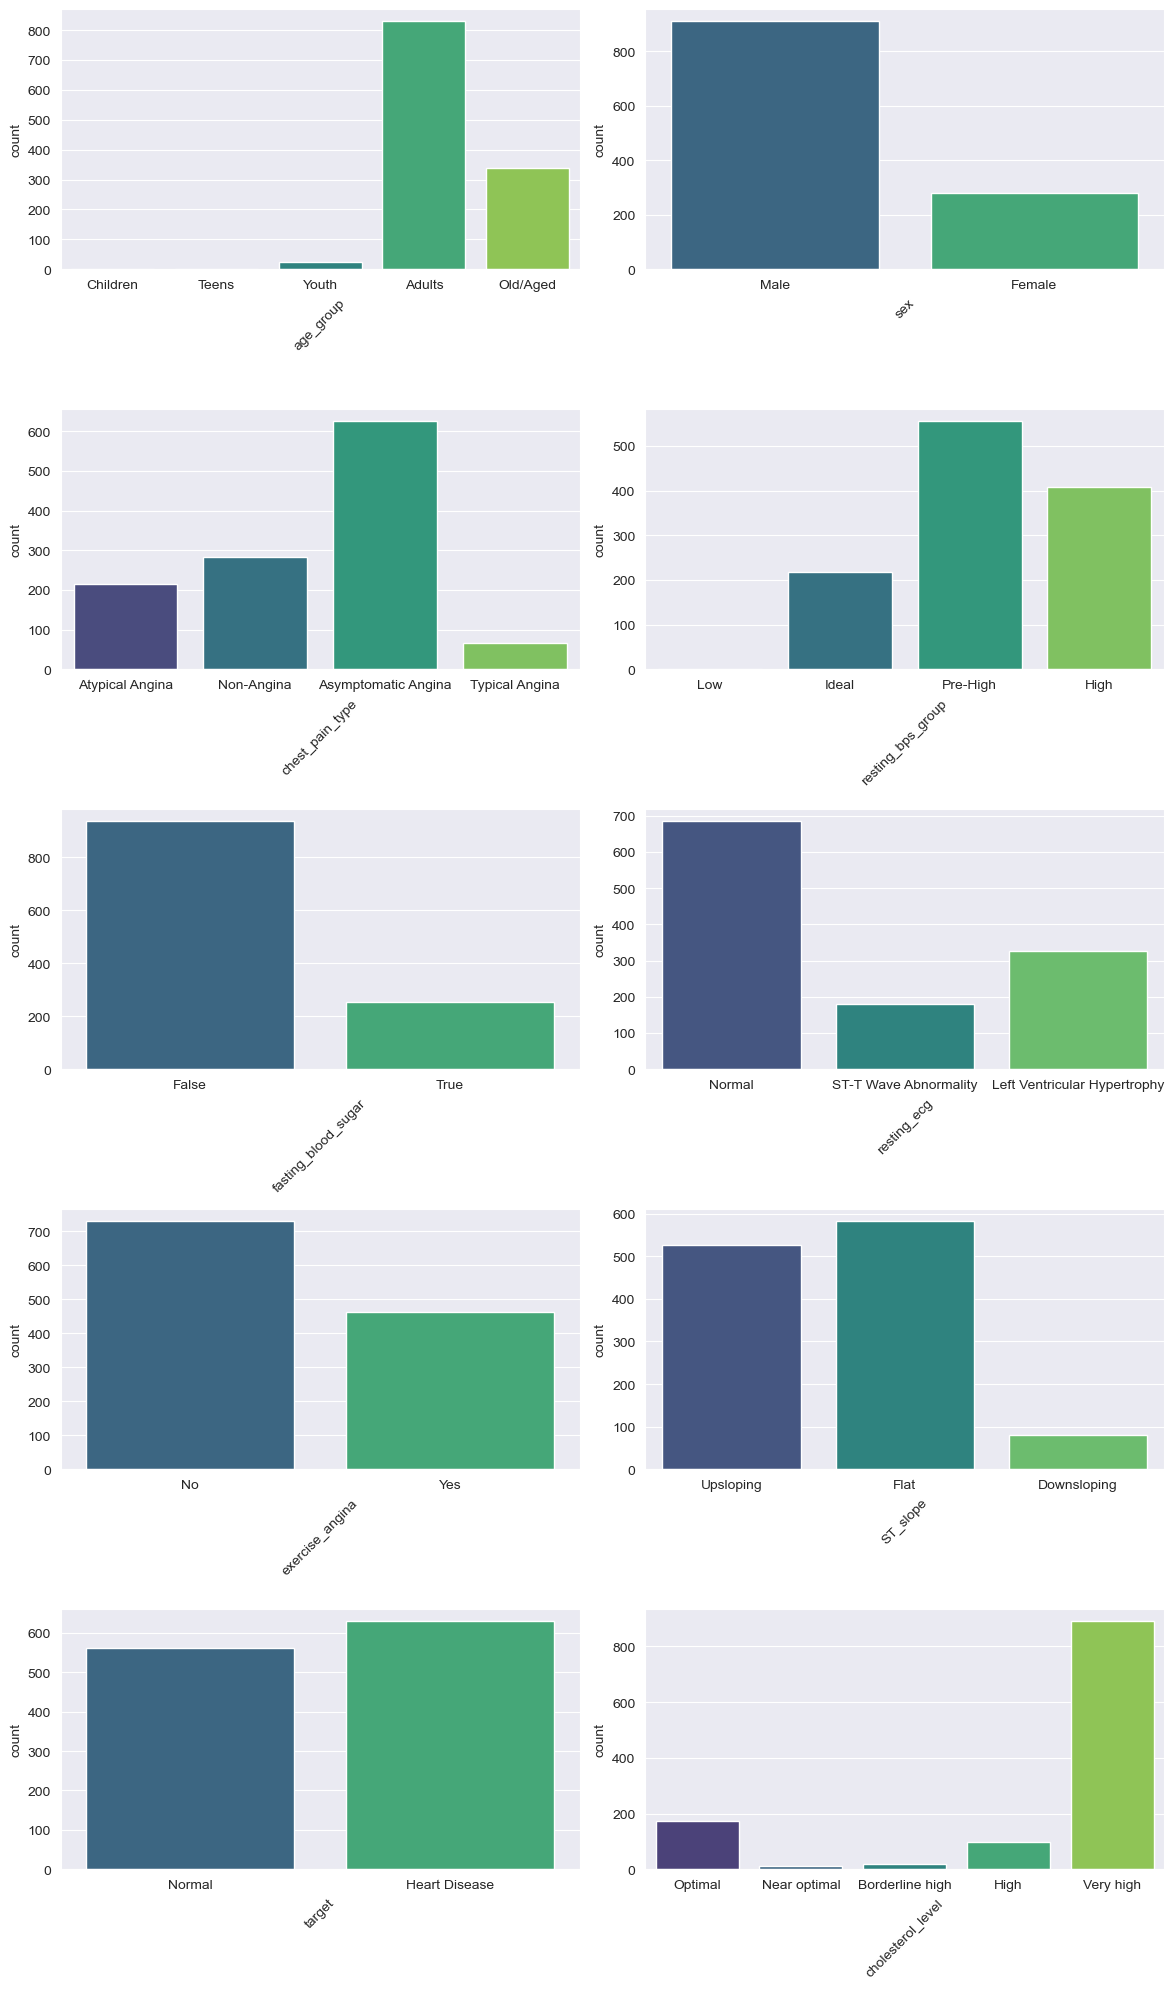

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))

display_data = {
    'age_group': {
        'ax' : [0,0],
        'color' : 'cyan',
        'palette' : 'viridis'
    },
    'sex': {
        'ax' : [0,1],
        'color' : 'cyan',
        'palette' : 'viridis'
    },
    'chest_pain_type': {
        'ax' : [1,0],
        'color' : 'cyan',
        'palette' : 'viridis'
    },
    'resting_bps_group': {
        'ax' : [1,1],
        'color' : 'cyan',
        'palette' : 'viridis'
    },
    'fasting_blood_sugar': {
        'ax' : [2,0],
        'color' : 'cyan',
        'palette' : 'viridis'
    },
    'resting_ecg': {
        'ax' : [2,1],
        'color' : 'cyan',
        'palette' : 'viridis'
    },
    'exercise_angina': {
        'ax' : [3,0],
        'color' : 'cyan',
        'palette' : 'viridis'
    },
    'ST_slope': {
        'ax' : [3,1],
        'color' : 'cyan',
        'palette' : 'viridis'
    },
    'target': {
        'ax' : [4,0],
        'color' : 'cyan',
        'palette' : 'viridis'
    },
    'cholesterol_level': {
        'ax' : [4,1],
        'color' : 'cyan',
        'palette' : 'viridis'
    },
    
}

def plot_uni_graph(dataset, data_dict):
    for key, val in data_dict.items():
        sns.countplot(data=dataset, x=key, ax=axes[val['ax'][0], val['ax'][1]],color=val['color'], palette=val['palette'])

    for ax in axes.flat:
        ax.set_xlabel(ax.get_xlabel(), rotation=45)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show plot
    plt.show()

plot_uni_graph(Heart_data_copy, display_data)


## Bivariate


 ____________________________________________________________________________________________________ 


SEX 

 ( sex
Male      909
Female    281
Name: count, dtype: int64 )


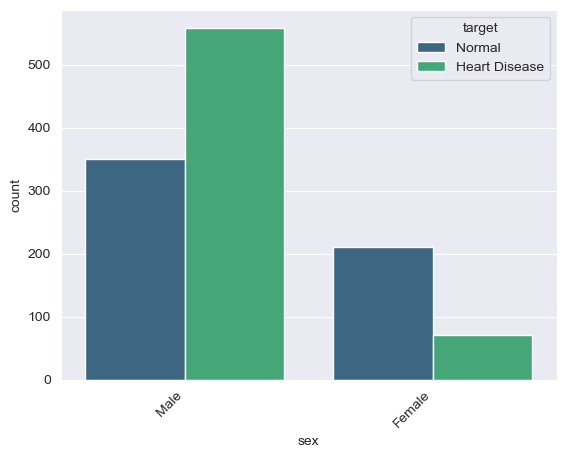


 ____________________________________________________________________________________________________ 


CHEST_PAIN_TYPE 

 ( chest_pain_type
Asymptomatic Angina    625
Non-Angina             283
Atypical Angina        216
Typical Angina          66
Name: count, dtype: int64 )


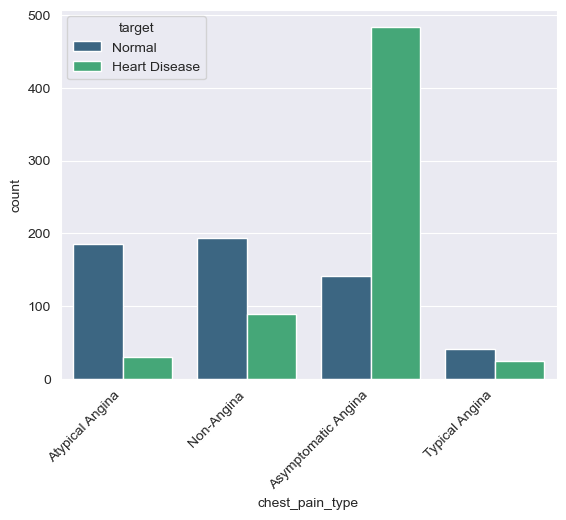


 ____________________________________________________________________________________________________ 


FASTING_BLOOD_SUGAR 

 ( fasting_blood_sugar
False    936
True     254
Name: count, dtype: int64 )


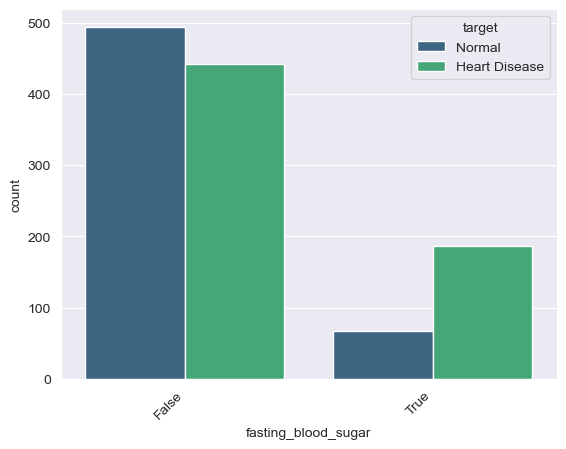


 ____________________________________________________________________________________________________ 


RESTING_ECG 

 ( resting_ecg
Normal                          684
Left Ventricular Hypertrophy    325
ST-T Wave Abnormality           181
Name: count, dtype: int64 )


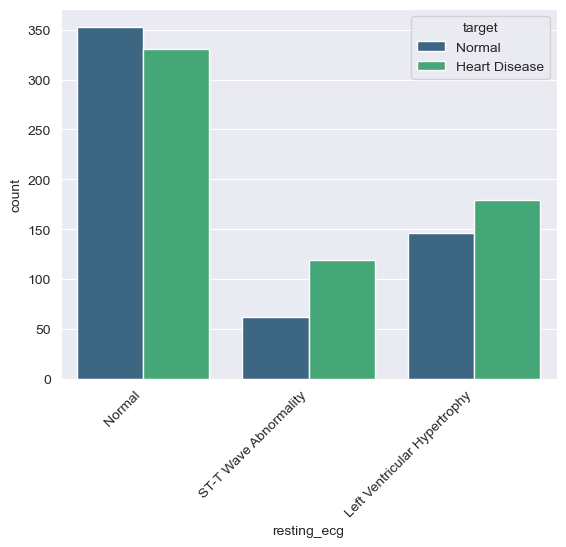


 ____________________________________________________________________________________________________ 


EXERCISE_ANGINA 

 ( exercise_angina
No     729
Yes    461
Name: count, dtype: int64 )


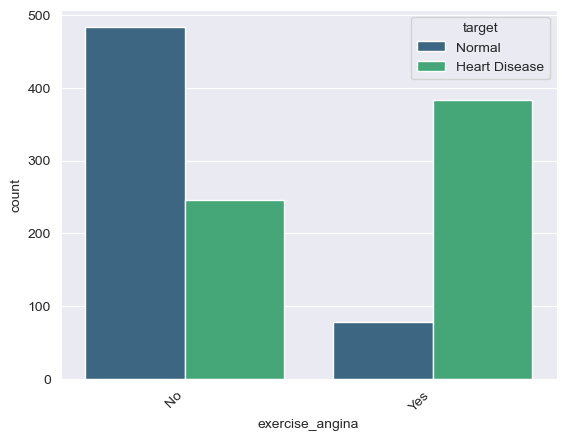


 ____________________________________________________________________________________________________ 


ST_SLOPE 

 ( ST_slope
Flat           582
Upsloping      526
Downsloping     81
Name: count, dtype: int64 )


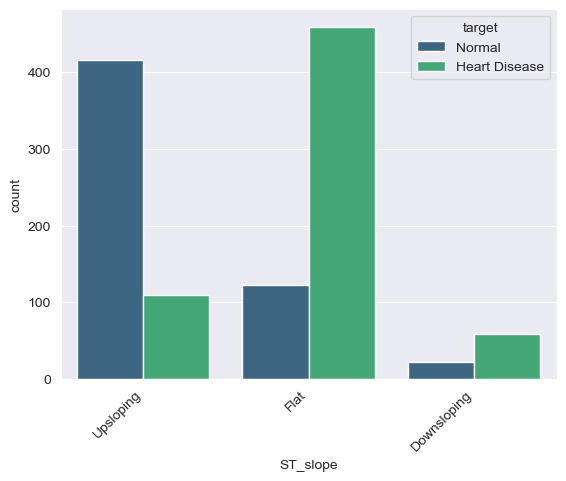


 ____________________________________________________________________________________________________ 


AGE_GROUP 

 ( age_group
Adults      829
Old/Aged    337
Youth        24
Children      0
Teens         0
Name: count, dtype: int64 )


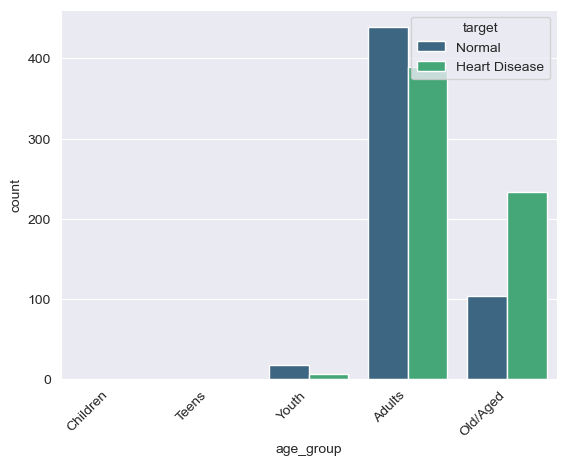


 ____________________________________________________________________________________________________ 


CHOLESTEROL_LEVEL 

 ( cholesterol_level
Very high          890
Optimal            173
High                99
Borderline high     18
Near optimal        10
Name: count, dtype: int64 )


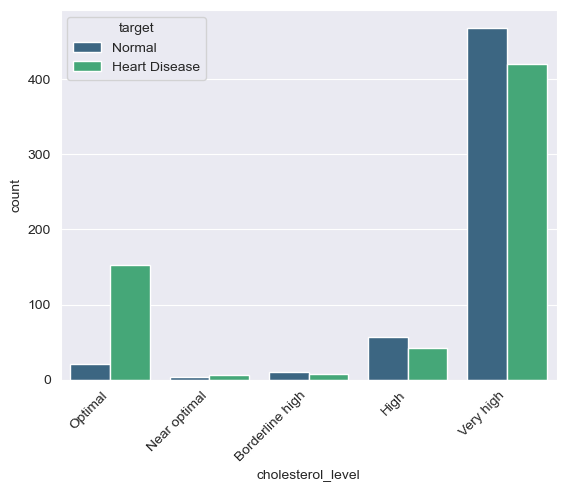


 ____________________________________________________________________________________________________ 


RESTING_BPS_GROUP 

 ( resting_bps_group
Pre-High    555
High        407
Ideal       217
Low           1
Name: count, dtype: int64 )


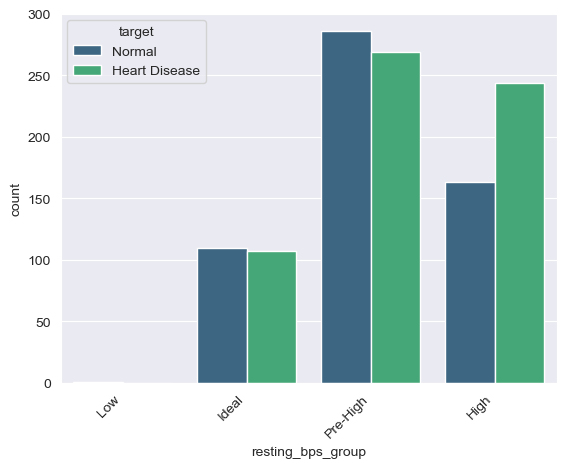

In [21]:
chosen_columns = ['sex', 'chest_pain_type',
           'fasting_blood_sugar', 'resting_ecg',
           'exercise_angina', 'ST_slope', 'age_group', 'cholesterol_level', 'resting_bps_group']


def plot_bivariate_graph(columns, dataset):
    for col in columns:
        print('\n', '_'*100,'\n\n')
        print( col.upper(),'\n\n', f"( {Heart_data_copy[col].value_counts()} )")
        
        plt.figure()
        sns.countplot(data=dataset, x=col, hue='target', palette="viridis")
        plt.xticks(rotation=45, ha='right')
        plt.show()


plot_bivariate_graph(chosen_columns, Heart_data_copy)

# Data Preprocessing


In [22]:
heart_data.head(10)

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [23]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest_pain_type      1190 non-null   int64  
 3   resting_bp_s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting_blood_sugar  1190 non-null   int64  
 6   resting_ecg          1190 non-null   int64  
 7   max_heart_rate       1190 non-null   int64  
 8   exercise_angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST_slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [33]:

class DataPreprocessing:
    def __init__(self, dataset):
        self.data = dataset
        
    def get_target(self, targetColumn):
        X = self.data.drop(targetColumn, axis=1)
        y = self.data[targetColumn]
        
        return {
            'x': X,
            'y': y
        }
        
    def standardize_features(self):
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(self.get_target('target')['x'])
        
        return X_scaled
    
    def split_data(self):
        X_train, X_test, y_train, y_test = train_test_split(self.standardize_features(), self.get_target('target')['y'], test_size=0.2, random_state=42)
        
        return {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test
        }

    def get_X_train(self):
        return self.split_data()['X_train']
    
    def get_X_test(self):
        return self.split_data()['X_test']

    def get_y_train(self):
        return self.split_data()['y_train']

    def get_y_test(self):
        return self.split_data()['y_test']
    

In [34]:
# Getting features and target

processed_data = DataPreprocessing(heart_data)
processed_data.get_target('target')

# Getting split data
X_train =  processed_data.get_X_train()
X_test =  processed_data.get_X_test()
y_train =  processed_data.get_y_train()
y_test =  processed_data.get_y_test()


# Building the Model


In [42]:
models = {
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
}

param_grids = {
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'DecisionTree': {'max_depth': [3, 5, 7, 9]},
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 9]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
}

results = []


# Function to evaluate models
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_train_prediction = model.predict(x_train)
    y_test_prediction = model.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_train_prediction)
    test_accuracy = accuracy_score(y_test, y_test_prediction)
    train_f1 = f1_score(y_train, y_train_prediction)
    test_f1 = f1_score(y_test, y_test_prediction)

    print(f'\nTrain Accuracy: {train_accuracy:.4f}\n')
    print(f'Test Accuracy: {test_accuracy:.4f}\n')
    print(f'Train F1 Score: {train_f1:.4f}\n')
    print(f'Test F1 Score: {test_f1:.4f}\n')

    print('\n\nClassification Report (Test Data):\n')
    print(classification_report(y_test, y_test_prediction))

    print('Confusion Matrix (Test Data):')
    sns.heatmap(confusion_matrix(y_test, y_test_prediction), annot=True, fmt='d', cmap='Blues')
    plt.show()

    return train_accuracy, test_accuracy, train_f1, test_f1
        


Model: KNN
Best Parameters: {'n_neighbors': 7}

Train Accuracy: 0.8792

Test Accuracy: 0.8739

Train F1 Score: 0.8853

Test F1 Score: 0.8889



Classification Report (Test Data):

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       107
           1       0.86      0.92      0.89       131

    accuracy                           0.87       238
   macro avg       0.88      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238

Confusion Matrix (Test Data):


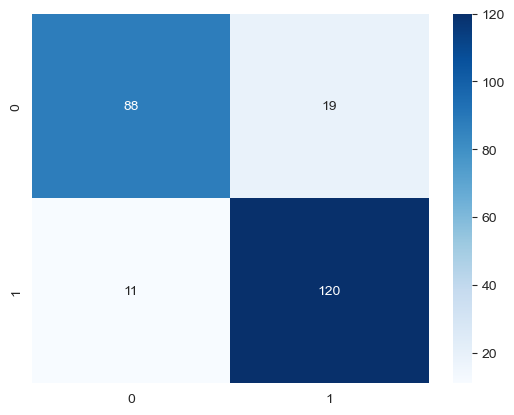


Model: DecisionTree
Best Parameters: {'max_depth': 9}

Train Accuracy: 0.9821

Test Accuracy: 0.8950

Train F1 Score: 0.9830

Test F1 Score: 0.9027



Classification Report (Test Data):

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       107
           1       0.92      0.89      0.90       131

    accuracy                           0.89       238
   macro avg       0.89      0.90      0.89       238
weighted avg       0.90      0.89      0.90       238

Confusion Matrix (Test Data):


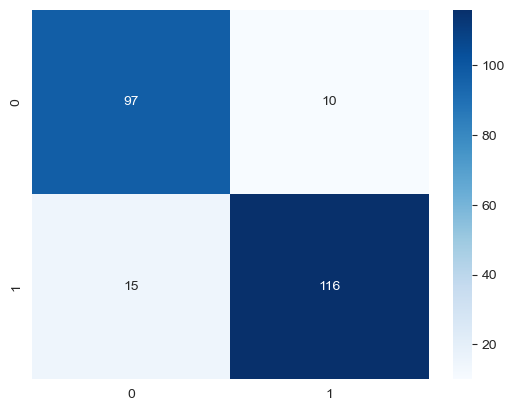


Model: LogisticRegression
Best Parameters: {'C': 0.1}

Train Accuracy: 0.8330

Test Accuracy: 0.8613

Train F1 Score: 0.8396

Test F1 Score: 0.8745



Classification Report (Test Data):

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238

Confusion Matrix (Test Data):


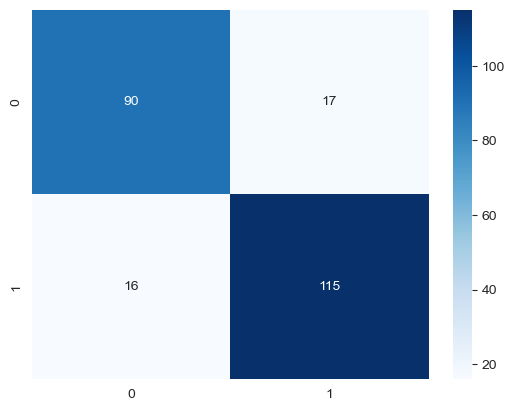


Model: RandomForest
Best Parameters: {'max_depth': 9, 'n_estimators': 200}

Train Accuracy: 0.9842

Test Accuracy: 0.9454

Train F1 Score: 0.9850

Test F1 Score: 0.9509



Classification Report (Test Data):

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.94      0.96      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238

Confusion Matrix (Test Data):


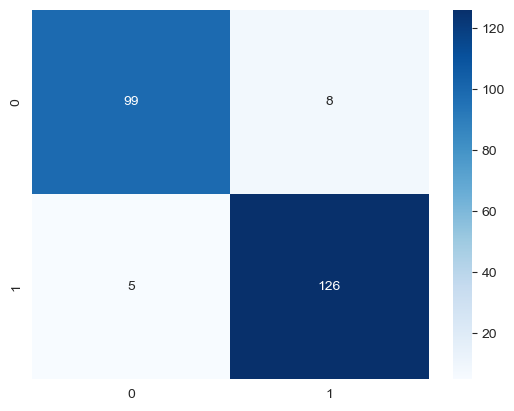


Model: XGBoost
Best Parameters: {'learning_rate': 0.2, 'n_estimators': 200}

Train Accuracy: 1.0000

Test Accuracy: 0.9370

Train F1 Score: 1.0000

Test F1 Score: 0.9442



Classification Report (Test Data):

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       107
           1       0.92      0.97      0.94       131

    accuracy                           0.94       238
   macro avg       0.94      0.93      0.94       238
weighted avg       0.94      0.94      0.94       238

Confusion Matrix (Test Data):


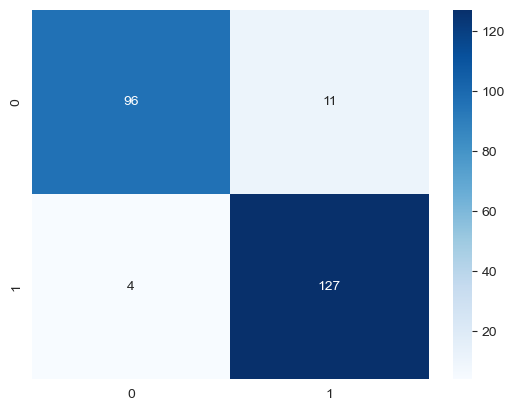

In [43]:
# Using Grid search to find the best hyperparameter for each model
for model_name, model in models.items():
    print(f'\nModel: {model_name}')
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    print(f'Best Parameters: {grid_search.best_params_}')

    train_acc, test_acc, train_f1, test_f1 = evaluate_model(best_model, X_train, X_test, y_train, y_test)

    results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Train F1 Score': train_f1,
        'Test F1 Score': test_f1
    })

# Model Comparison

                Model                                  Best Params  \
0                 KNN                           {'n_neighbors': 7}   
1        DecisionTree                             {'max_depth': 9}   
2  LogisticRegression                                   {'C': 0.1}   
3        RandomForest        {'max_depth': 9, 'n_estimators': 200}   
4             XGBoost  {'learning_rate': 0.2, 'n_estimators': 200}   

   Train Accuracy  Test Accuracy  Train F1 Score  Test F1 Score  
0        0.879202       0.873950        0.885344       0.888889  
1        0.982143       0.894958        0.982983       0.902724  
2        0.832983       0.861345        0.839556       0.874525  
3        0.984244       0.945378        0.984985       0.950943  
4        1.000000       0.936975        1.000000       0.944238  


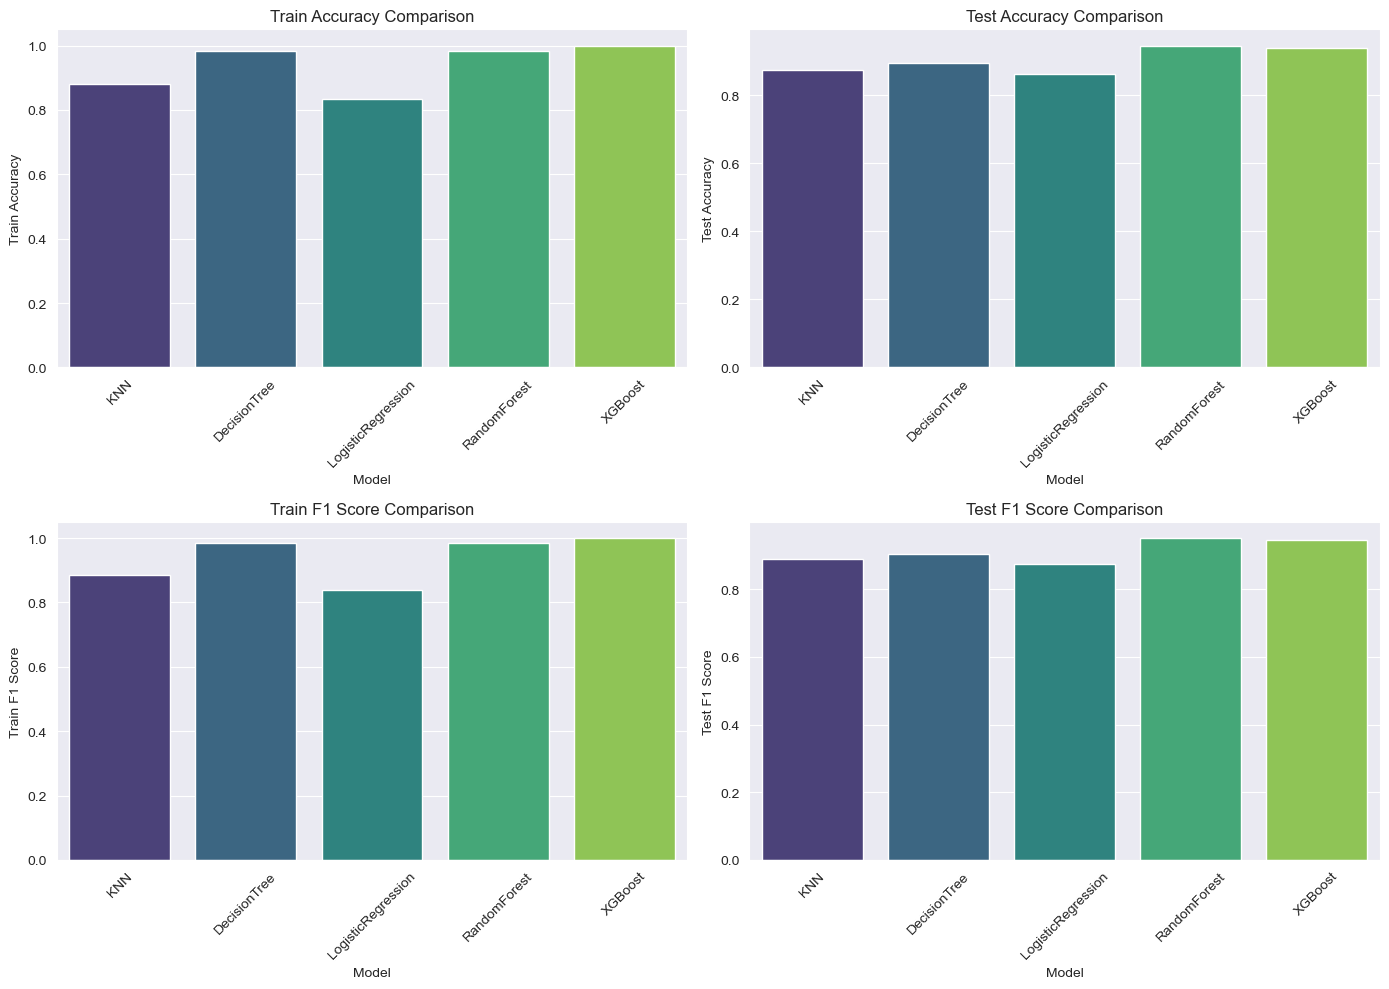

In [46]:
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

metrics = ['Train Accuracy', 'Test Accuracy', 'Train F1 Score', 'Test F1 Score']

for idx, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=results_df, ax=axes[idx], palette='viridis')
    axes[idx].set_title(f'{metric} Comparison')
    axes[idx].set_ylabel(metric)
    axes[idx].set_xlabel('Model')
    for item in axes[idx].get_xticklabels():
        item.set_rotation(45)

plt.tight_layout()
plt.show()